

# Linear Regression: Clearly Explained

This Jupyter Notebook is based on the video ["Linear Regression, Clearly Explained!!!"](https://www.youtube.com/watch?v=7ArmBVF2dCs).
It thoroughly covers the core concepts of linear regression, augmented with additional explanations, visualizations, and references to make the material engaging and educational.

### Objectives:
- Understand the fundamentals of linear regression.
- Learn about least squares, residuals, \( R^2 \), and \( p \)-values.
- Visualize data and results to reinforce learning.
- Explore the mathematical basis of linear regression.

---

### Outline:
1. What is Linear Regression?
2. The Method of Least Squares
3. Residuals and Sum of Squares
4. \( R^2 \): Coefficient of Determination
5. Statistical Significance: \( p \)-values and \( F \)-tests
6. Applications and Examples


---

### Did You Know?
Linear regression is not just about fitting a line! It's about interpreting relationships, making predictions, and understanding the strength of association. 

Explore how changing \( X \) impacts \( Y \) in the next visualization!




## What is Linear Regression?

Linear regression is a statistical method used to model the relationship between one dependent variable (\( Y \)) and one or more independent variables (\( X \)). 
In the simplest case, with one independent variable, the relationship is modeled by the equation of a line:

$$ Y = eta_0 + eta_1 X + \epsilon $$

Where:
- \( eta_0 \): Intercept (value of \( Y \) when \( X = 0 \)).
- \( eta_1 \): Slope (rate of change of \( Y \) with \( X \)).
- \( \epsilon \): Random error term.

Linear regression aims to find the best-fit line that minimizes the error term using the method of least squares.


---

### Did You Know?
Linear regression is not just about fitting a line! It's about interpreting relationships, making predictions, and understanding the strength of association. 

Explore how changing \( X \) impacts \( Y \) in the next visualization!




# Visualization: Scatter Plot of Data
# Below, you can generate a scatter plot to visualize the relationship between \( X \) and \( Y \).
# Use libraries like matplotlib to create the plot.


---

### Did You Know?
Linear regression is not just about fitting a line! It's about interpreting relationships, making predictions, and understanding the strength of association. 

Explore how changing \( X \) impacts \( Y \) in the next visualization!


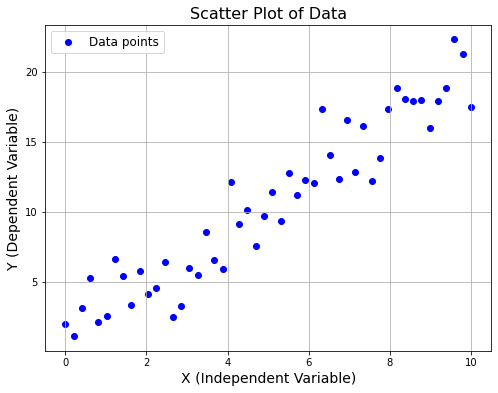

In [10]:

import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(42)
X = np.linspace(0, 10, 50)
Y = 2 * X + 1 + np.random.normal(0, 2, size=X.shape)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color="blue", label="Data points")
plt.title("Scatter Plot of Data", fontsize=16)
plt.xlabel("X (Independent Variable)", fontsize=14)
plt.ylabel("Y (Dependent Variable)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



# Visualization: Analyze the Data
# Create plots or graphs to interpret the output of the above code cell.


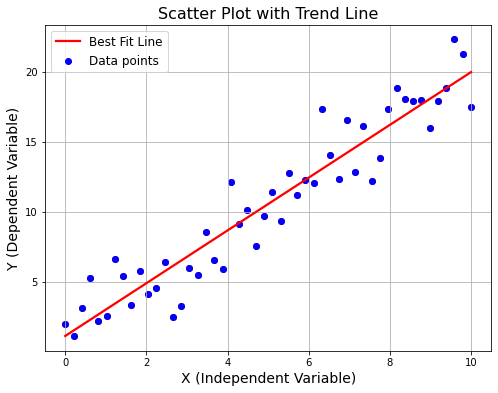

In [12]:

# Adding a trend line to the scatter plot
import seaborn as sns

# Creating a regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=X, y=Y, ci=None, color="red", line_kws={"label": "Best Fit Line"})
plt.scatter(X, Y, color="blue", label="Data points")
plt.title("Scatter Plot with Trend Line", fontsize=16)
plt.xlabel("X (Independent Variable)", fontsize=14)
plt.ylabel("Y (Dependent Variable)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
# Implementing Least Squares Method Mathematically

# For linear regression with two variables, we use the equation: y = mx + b
# The least squares method minimizes the sum of squared residuals:
# min Σ(y_i - (mx_i + b))^2

# To find m and b, we take partial derivatives and set them to 0:
# ∂/∂m: Σ -2x_i(y_i - (mx_i + b)) = 0
# ∂/∂b: Σ -2(y_i - (mx_i + b)) = 0

# This gives us two equations:
# Σ(x_i * y_i) = m * Σ(x_i^2) + b * Σ(x_i)
# Σ(y_i) = m * Σ(x_i) + n * b

# Solving these equations:
n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_xy = np.sum(X * Y)
sum_x2 = np.sum(X**2)

# Calculate slope (m) and intercept (b)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b = (sum_y - m * sum_x) / n

print(f"Calculated slope (m): {m:.4f}")
print(f"Calculated intercept (b): {b:.4f}")

# Generate predictions
Y_pred = m * X + b

# Calculate R-squared
ss_tot = np.sum((Y - np.mean(Y))**2)
ss_res = np.sum((Y - Y_pred)**2)
r2 = 1 - (ss_res / ss_tot)
print(f"R-squared: {r2:.4f}")

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label=f'Least Squares Line (y = {m:.2f}x + {b:.2f})')
plt.title('Least Squares Regression Line', fontsize=16)
plt.xlabel('X (Independent Variable)', fontsize=14)
plt.ylabel('Y (Dependent Variable)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# The mathematical explanation:
# 1. We derived the normal equations from minimizing the sum of squared residuals
# 2. We solved the system of equations using the following formulas:
#    m = (n∑xy - ∑x∑y) / (n∑x² - (∑x)²)
#    b = (∑y - m∑x) / n
# 3. R-squared measures the proportion of variance in Y explained by X
#    R² = 1 - (sum of squared residuals / total sum of squares)


In [ ]:
# Implementing Least Squares using Matrix Approach (Pseudo-inverse)

# Create design matrix X_mat by adding a column of 1's for the intercept term
X_mat = np.column_stack((np.ones(len(X)), X))

# Calculate the pseudo-inverse solution
# β = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ Y

# Extract intercept and slope
b_matrix = beta[0]
m_matrix = beta[1]

print(f"Matrix approach slope (m): {m_matrix:.4f}")
print(f"Matrix approach intercept (b): {b_matrix:.4f}")

# Generate predictions using matrix approach
Y_pred_matrix = X_mat @ beta

# Calculate R-squared for matrix approach
ss_tot_matrix = np.sum((Y - np.mean(Y))**2)
ss_res_matrix = np.sum((Y - Y_pred_matrix)**2)
r2_matrix = 1 - (ss_res_matrix / ss_tot_matrix)
print(f"R-squared (Matrix approach): {r2_matrix:.4f}")

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred_matrix, color='green', label=f'Matrix Solution (y = {m_matrix:.2f}x + {b_matrix:.2f})')
plt.title('Least Squares Regression using Matrix Approach', fontsize=16)
plt.xlabel('X (Independent Variable)', fontsize=14)
plt.ylabel('Y (Dependent Variable)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# The matrix approach explanation:
# 1. We create a design matrix X = [1 x] where 1 is a column of ones
# 2. The pseudo-inverse solution is β = (X^T X)^(-1) X^T y
# 3. This gives us the same results as the algebraic solution
# 4. The matrix approach is more generalizable to multiple regression


In [ ]:
# Implementing Least Squares using Matrix Approach (Pseudo-inverse)

# Create design matrix X_mat by adding a column of 1's for the intercept term
X_mat = np.column_stack((np.ones(len(X)), X))

# Calculate the pseudo-inverse solution
# β = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ Y

# Extract intercept and slope
b_matrix = beta[0]
m_matrix = beta[1]

print(f"Matrix approach slope (m): {m_matrix:.4f}")
print(f"Matrix approach intercept (b): {b_matrix:.4f}")

# Generate predictions using matrix approach
Y_pred_matrix = X_mat @ beta

# Calculate R-squared for matrix approach
ss_tot_matrix = np.sum((Y - np.mean(Y))**2)
ss_res_matrix = np.sum((Y - Y_pred_matrix)**2)
r2_matrix = 1 - (ss_res_matrix / ss_tot_matrix)
print(f"R-squared (Matrix approach): {r2_matrix:.4f}")

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred_matrix, color='green', label=f'Matrix Solution (y = {m_matrix:.2f}x + {b_matrix:.2f})')
plt.title('Least Squares Regression using Matrix Approach', fontsize=16)
plt.xlabel('X (Independent Variable)', fontsize=14)
plt.ylabel('Y (Dependent Variable)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# The matrix approach explanation:
# 1. We create a design matrix X = [1 x] where 1 is a column of ones
# 2. The pseudo-inverse solution is β = (X^T X)^(-1) X^T y
# 3. This gives us the same results as the algebraic solution
# 4. The matrix approach is more generalizable to multiple regression


Matrix approach slope (m): 1.8840
Matrix approach intercept (b): 1.1289
R-squared (Matrix approach): 0.9032


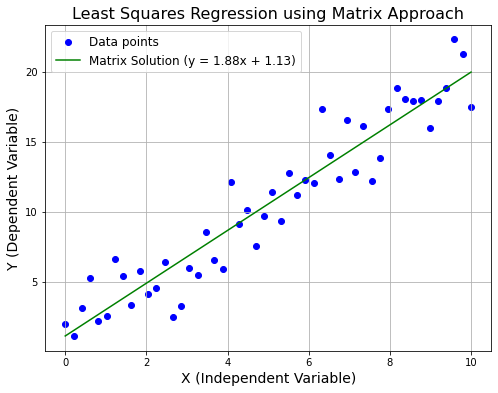

In [17]:
# Implementing Least Squares using Matrix Approach (Pseudo-inverse)

# Create design matrix X_mat by adding a column of 1's for the intercept term
X_mat = np.column_stack((np.ones(len(X)), X))

# Calculate the pseudo-inverse solution
# β = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X_mat.T @ X_mat) @ X_mat.T @ Y

# Extract intercept and slope
b_matrix = beta[0]
m_matrix = beta[1]

print(f"Matrix approach slope (m): {m_matrix:.4f}")
print(f"Matrix approach intercept (b): {b_matrix:.4f}")

# Generate predictions using matrix approach
Y_pred_matrix = X_mat @ beta

# Calculate R-squared for matrix approach
ss_tot_matrix = np.sum((Y - np.mean(Y))**2)
ss_res_matrix = np.sum((Y - Y_pred_matrix)**2)
r2_matrix = 1 - (ss_res_matrix / ss_tot_matrix)
print(f"R-squared (Matrix approach): {r2_matrix:.4f}")

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred_matrix, color='green', label=f'Matrix Solution (y = {m_matrix:.2f}x + {b_matrix:.2f})')
plt.title('Least Squares Regression using Matrix Approach', fontsize=16)
plt.xlabel('X (Independent Variable)', fontsize=14)
plt.ylabel('Y (Dependent Variable)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# The matrix approach explanation:
# 1. We create a design matrix X = [1 x] where 1 is a column of ones
# 2. The pseudo-inverse solution is β = (X^T X)^(-1) X^T y
# 3. This gives us the same results as the algebraic solution
# 4. The matrix approach is more generalizable to multiple regression
